# analisis de datos sobre iris

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from sklearn.datasets import load_iris

## Carga de datos

In [4]:
data = load_iris()
data.keys

<function Bunch.keys>

In [5]:
variables = pd.DataFrame(data['data'],columns=data['feature_names'])

In [6]:
variables.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [7]:
variables['clase']=data['target']
variables

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clase
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# dict(zip(range(len(data['target_names]))data['target_names]))

In [8]:
{0:'setosa',1:'versicolor',2:'virginica'}

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [28]:
variables['clase'].replace({0:'setosa',1:'versicolor',2:'virginica'}, inplace=True)

variables.to_parquet('iris.parquet',index=False) #guardar dataframe

In [10]:
df=pd.read_parquet('iris.parquet')

verificacion inicial.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   clase              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
clase                0
dtype: int64

## no hay missing

In [13]:
df[df.duplicated()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clase
142,5.8,2.7,5.1,1.9,virginica


## el duplicado posiblemente sea por inprecision por la escala

In [14]:
df[df.duplicated(keep=False)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clase
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


## observaciones
1. no hay nulos 
2. aunque hay duplicados podemos asumir que es por la escala o por la proporción 
3. los tipos de datos estan correctos. 

## limpieza y preporcesado 

#### preprocesado 

## Feature Engineer

In [15]:
df['area sepal (cm2)'] = df['sepal length (cm)']* df['sepal width (cm)']
df['area petal (cm2)'] = df['sepal length (cm)']* df['sepal width (cm)']

## se crean las columnas de área del pétalo y área del sépalo

In [46]:
#clase = df.pop('clase')

In [ ]:
#df = df [['sepal_lenght(cm)','sepal with(cm)',
#          'area sepal(cm)','petal lenght(cm)',
#           '']]

se crearon 2 nuevas variables nuevas que representan el areade parte de la flor

analisis descriptivo

In [16]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),area sepal (cm2),area petal (cm2)
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,17.822867,17.822867
std,0.828066,0.435866,1.765298,0.762238,3.361854,3.361854
min,4.300000,2.000000,1.000000,0.100000,10.000000,10.000000
25%,5.100000,2.800000,1.600000,0.300000,15.660000,15.660000
50%,5.800000,3.000000,4.350000,1.300000,17.660000,17.660000
75%,6.400000,3.300000,5.100000,1.800000,20.325000,20.325000
max,7.900000,4.400000,6.900000,2.500000,30.020000,30.020000


In [17]:
df['clase'].value_counts(normalize=True)

clase
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64

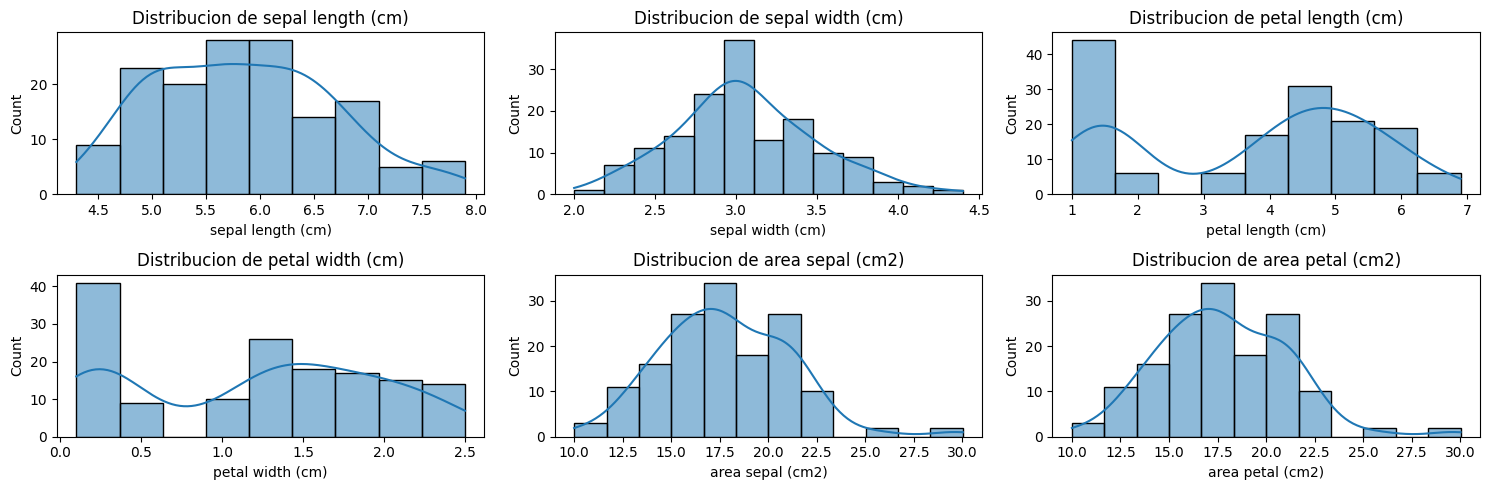

In [18]:
plt.figure(figsize=(15,5))

for i,feature in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(2,3,i+1)
    sns.histplot(data=df,x=feature,kde=True)
    plt.title(f'Distribucion de {feature}')

plt.tight_layout()
plt.show();


### Analisis exploratorio
analisis bivariante/multivariante

<Figure size 1500x500 with 0 Axes>

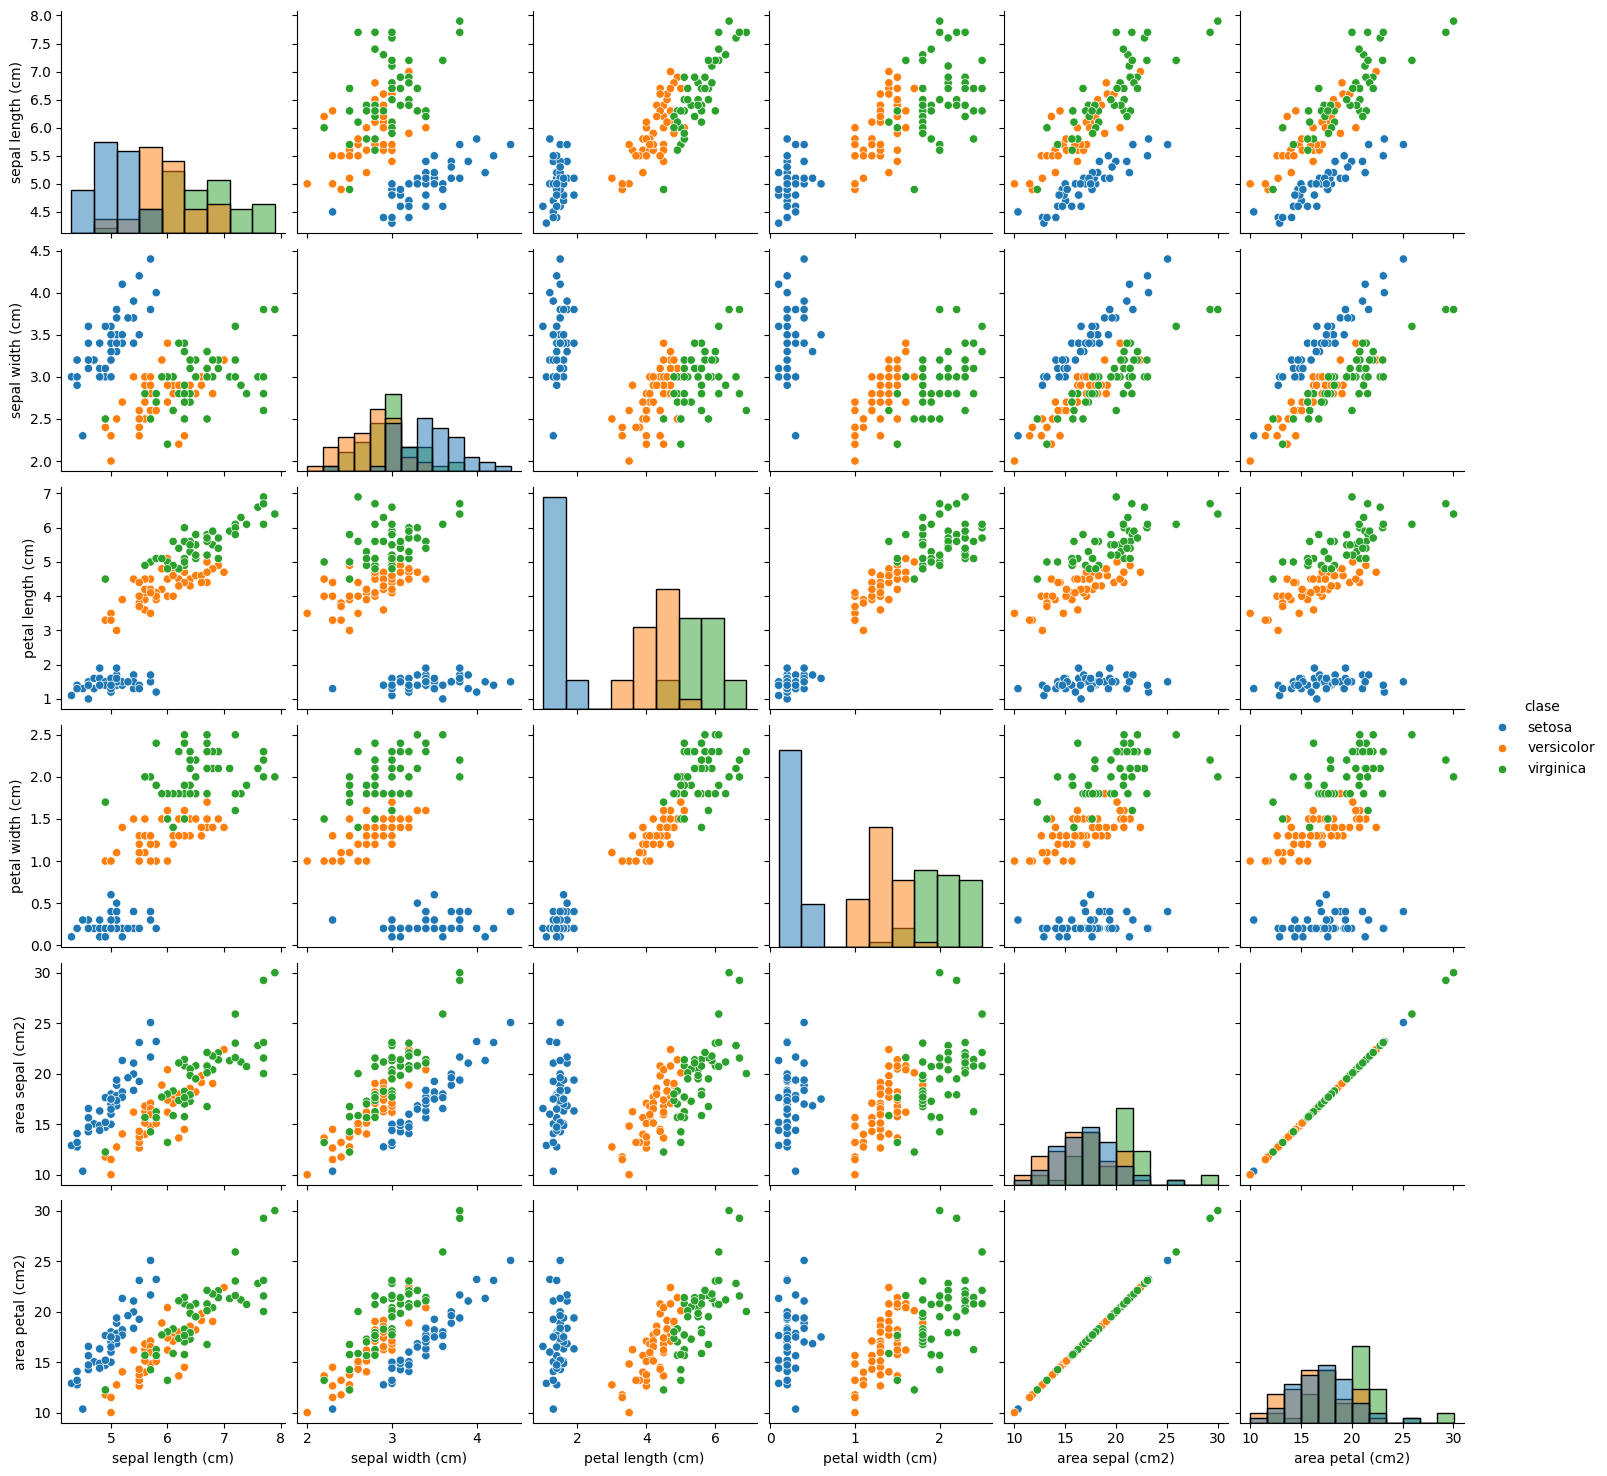

In [25]:
plt.figure(figsize=(15,5))
sns.pairplot(df,hue='clase',diag_kind='hist')
plt.show();

In [ ]:
#df.drop(columns=['area sepal(cm2)','area petal(cm2)','clase']).columns)

In [26]:
FEATURES = ['sepal lenght(cm)','sepal windth(cm)',
            'petal lenght(cm)','petal windth(cm)']

TARGET = ['clase']

In [37]:
plt.figure(figsize=(15,5))
for i, col in enumerate(df[FEATURES].columns):
    plt.subplot(2,2,i+1)
    sns.boxenplot(data=df,x='clase',y=col)
    plt.title(f'Boxenplot de {col} por flor')
plt.tight_layout()
plt.show();


KeyError: "None of [Index(['sepal lenght(cm)', 'sepal windth(cm)', 'petal lenght(cm)',\n       'petal windth(cm)'],\n      dtype='object')] are in the [columns]"

<Figure size 1500x500 with 0 Axes>

<Axes: >

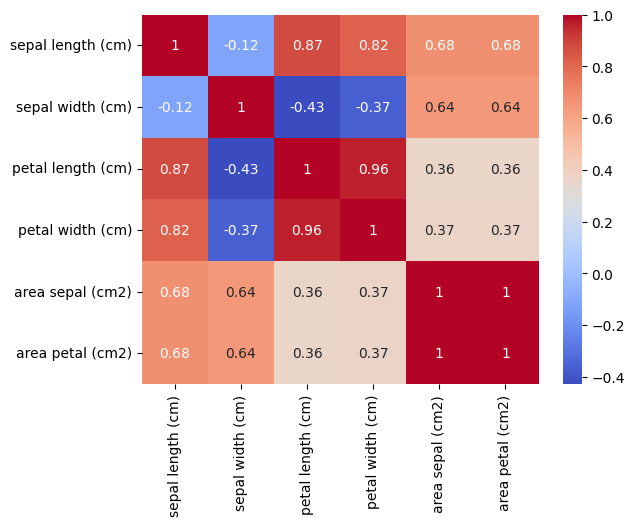

In [38]:
sns.heatmap(df.drop(columns='clase').corr(),annot=True,cmap='coolwarm')

## Hallazgos

existe clara separacion entre setosa y las otras so clases
Versicolor y virginica muestran cierto solapamiento
fuerte correlación entre latgo y ancho
la flor setosa tiene petalos notablemente mas pequeños

## analisis diagnóstico



# análisis de la separiabilidad de flor

In [34]:
FEATURES

['sepal lenght(cm)',
 'sepal windth(cm)',
 'petal lenght(cm)',
 'petal windth(cm)']

ValueError: Could not interpret value `sepal lenght(cm)` for `x`. An entry with this name does not appear in `data`.

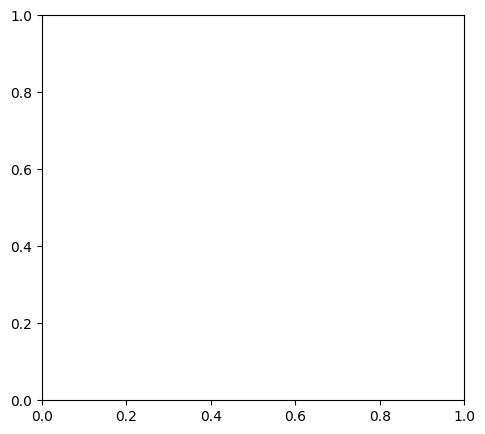

In [36]:
plt.figure(figsize=(12,5))

# relación de pétalo

plt.subplot(1,2,1)
sns.scatterplot(data=df, x='sepal lenght(cm)', y='sepal windth(cm)', hue='clase')
plt.title('Relación pétalo')

# relación de sépalo

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='sepal lenght(cm)', y='sepal windth(cm)', hue='clase')
plt.title('Relación pétalo')

plt.show();

## análisis de ratios

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxenplot(data=df, x='clase',y=)